# Main file where where simulation is run

In [1]:
##  load all the dependencies and files needed
%run loadpackagesandfiles.ipynb


In [2]:
##  create a graph of the loaded data, 
## gives access to variable FG which is the (directed) graph displayed below 
## (if it is not shown the plot can be activated by uncommenting in buildgraph.ipynb file)

%run buildgraph.ipynb
%run EnviromentReport.ipynb

#%run locktest.ipynb

found restriction 8.7


In [3]:

# loop over edges with data and check voorwaarden
'''
for edge in FG_S.edges(data=True):
    if edge[0] in [182]:
        print(edge)
    if edge[1] in [182]:
        print(edge)
    if edge[0] in [132]:
        print(edge)
    if edge[1] in [132]:
        print(edge)


# same for nodes
for node in FG.nodes(data=True):
    if node[0] == 155:
        print(node)
    if node[0] == 156:
        print(node)
    if node[0] == 73:
        print(node)
    if node[0] == 72:
        print(node)

'''


'\nfor edge in FG_S.edges(data=True):\n    if edge[0] in [182]:\n        print(edge)\n    if edge[1] in [182]:\n        print(edge)\n    if edge[0] in [132]:\n        print(edge)\n    if edge[1] in [132]:\n        print(edge)\n\n\n# same for nodes\nfor node in FG.nodes(data=True):\n    if node[0] == 155:\n        print(node)\n    if node[0] == 156:\n        print(node)\n    if node[0] == 73:\n        print(node)\n    if node[0] == 72:\n        print(node)\n\n'

In [4]:
## obtain the paths possible sorted by length 
## (these paths are classes containing node keys and path lengths (in meter?))
%run get_paths.ipynb
#%run testpaths.ipynb

## below you see the data that is contained in a path

In [5]:
print(len(ordered_paths))
#ordered_paths[8].plot(FG, save=True)


54


In [6]:
%run vessels.ipynb

In [7]:
#list_with_vessels = init_vessels([M8, M8_high, M8_loaded_low, M8_loaded], ordered_paths)
#new
#list_with_vesselsM1 = init_vessels([M1, M1_loaded], ordered_paths)

In [8]:
def start(env, vessel):
    while True:
        
        vessel.log_entry("Start sailing", env.now, "", vessel.geometry)
        yield from vessel.move()
        vessel.log_entry("Stop sailing", env.now, "", vessel.geometry)
        vessel.report()
        if vessel.geometry == nx.get_node_attributes(FG, "geometry")[vessel.route[-1]]:
            break

Queues:  Kreekraklock 0 0 1.5067672068614721
Queues:  Krammerlock 0 0 1.5224392349029663
Queues:  Kreekraklock 0 0 2.58932431176708
Queues:  Krammerlock 0 0 2.747351789777843
Queues:  Kreekraklock 0 0 2.957205419715832
Queues:  Kreekraklock 0 0 3.291407920843198
Queues:  Kreekraklock 0 0 3.293793584341786
Queues:  Krammerlock 0 0 3.432674694037855
Queues:  Kreekraklock 0 0 4.265514787957556
Queues:  Kreekraklock 0 0 4.315488271006892
Queues:  Kreekraklock 0 0 4.394984060532262
Queues:  Hansweertlock 0 0 4.674429925549239
Queues:  Hansweertlock 0 0 4.800668582669457
Queues:  Kreekraklock 0 0 5.172060522172051
Queues:  Hansweertlock 0 0 5.341889553674918
Queues:  Kreekraklock 0 0 5.454120183416599
Queues:  Kreekraklock 0 0 5.7112765346762675
Queues:  Kreekraklock 0 0 5.863176321898751
Queues:  Hansweertlock 0 0 5.946290560605774
Queues:  Hansweertlock 0 0 5.946798208580684
Queues:  Hansweertlock 0 0 5.991599636045372
Queues:  Kreekraklock 0 0 6.236683557107761
Queues:  Kreekraklock 0 0 6

Queues:  Krammerlock 0 1 14.973640285753023
Queues:  Krammerlock 0 1 14.976732806110268
Queues:  Kreekraklock 1 3 15.04106776963048
Queues:  Kreekraklock 0 3 15.076996482579696
Queues:  Hansweertlock 0 0 15.117558252479768
Queues:  Krammerlock 2 0 15.175236845773002
Queues:  Krammerlock 2 0 15.196458953827928
Queues:  Kreekraklock 2 2 15.335235139642037
Queues:  Kreekraklock 2 2 15.348241072673341
Queues:  Krammerlock 1 1 15.360238964459242
Queues:  Hansweertlock 0 0 15.399858072122516
Queues:  Kreekraklock 1 3 15.402657411701503
Queues:  Hansweertlock 0 0 15.421120560930962
Queues:  Krammerlock 1 1 15.458825767999963
Queues:  Kreekraklock 1 3 15.515748098395832
Queues:  Krammerlock 1 2 15.518149684498068
Queues:  Kreekraklock 1 2 15.545385338624097
Queues:  Krammerlock 0 2 15.559216680113977
Queues:  Kreekraklock 2 2 15.576850619046313
Queues:  Hansweertlock 0 0 15.587842666495217
Queues:  Krammerlock 0 2 15.58962815632148
Queues:  Kreekraklock 3 3 15.617115012079632
Queues:  Kreekrak

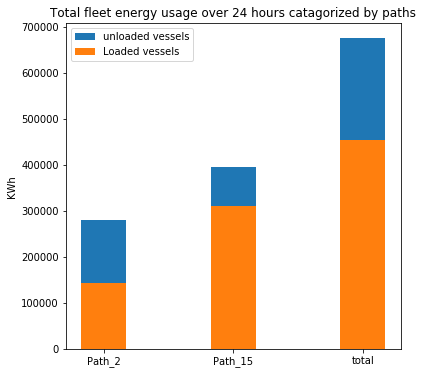

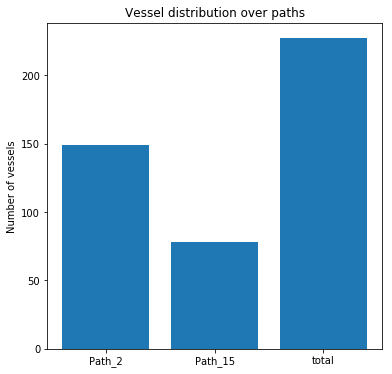

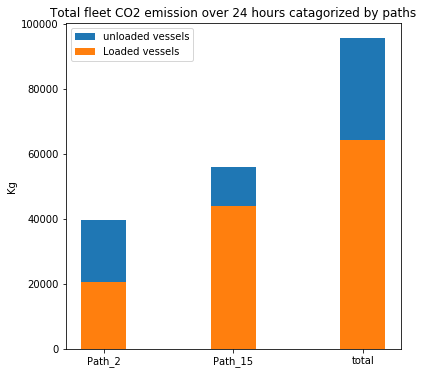

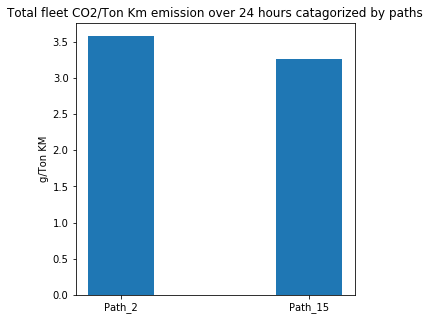

In [9]:
# Add graph to environment
env.FG = FG

env.paths = {}
env.enviromental_report = EnviromentReport()
# 24hours
SIM_TIME = 60 * 60 * 24
vessels = []

def pois(t):
    hour = int((t%(24*3600))/3600)
    average_on_hour = [4,5,5,6,7,8,10,14,19,20,20,20,20,19,18,17,15,13,12,11,10,9,7,5]
    number_of_boats_this_hour = np.random.poisson(average_on_hour[hour])
    if number_of_boats_this_hour == 0:
        return 0
    return 60 * 60 / number_of_boats_this_hour

def setup(env, distribution):
    # initial vessel
    i = 1
    vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
    vessel.env = env
    vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
    env.process(start(env, vessel))
    vessels.append(vessel)

    while True:
        # timeout before next ship is released
        i += 1
        yield env.timeout(distribution(env.now))
        vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
        vessel.env = env
        vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
        env.process(start(env, vessel))
        vessels.append(vessel)
        
env.process(setup(env, pois))

env.crossover_points = {182: ((184, 394,154,155,156,216,217, 218), (164, 134,133, 132,73,72,71,402,401)),
                        2: ((218,217,216,156,155,154,394,184), (401, 402,71,72,73,132,133,134,164)),
                        141: ((140,139,179,178,379), (363, 364, 365, 317, 403)),
                        382: ((379,178,179,139,140), (403,317,365,364,363)),
                        273:((222,221,220,279), (272, 209, 208, 210)),
                        278: ((279,220,221,222), (210,208, 209,272))
}

env.epoch = datetime.datetime.now()


env.run(until=SIM_TIME)

# EnviromentReport notebook for plot calculations
env.enviromental_report.plot_energy_usage()
env.enviromental_report.plot_path_usage()
env.enviromental_report.plot_co2_emission()
env.enviromental_report.plot_co2_emission_km_load()

In [10]:

vessel_log = pd.DataFrame.from_dict(vessels[150].log)
#
print(vessel_log.to_string())
print(len(vessels))


                                     Message     Timestamp Value                      Geometry
0                              Start sailing  47270.048644        POINT (4.4027792 51.6880539)
1    Sailing from node 263 to node 264 start  47270.048644     0  POINT (4.4027792 51.6880539)
2     Sailing from node 263 to node 264 stop  47332.983793     0  POINT (4.4000023 51.6864487)
3    Sailing from node 264 to node 248 start  47332.983793     0  POINT (4.4000023 51.6864487)
4     Sailing from node 264 to node 248 stop  47389.750884     0  POINT (4.3985059 51.6845369)
5    Sailing from node 248 to node 174 start  47389.750884     0  POINT (4.3985059 51.6845369)
6     Sailing from node 248 to node 174 stop  47594.750646     0  POINT (4.3893096 51.6794118)
7    Sailing from node 174 to node 171 start  47594.750646     0  POINT (4.3893096 51.6794118)
8     Sailing from node 174 to node 171 stop  47623.492463     0   POINT (4.3883543 51.678514)
9    Sailing from node 171 to node 173 start  4762

Path_15


C:\Users\leo1_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


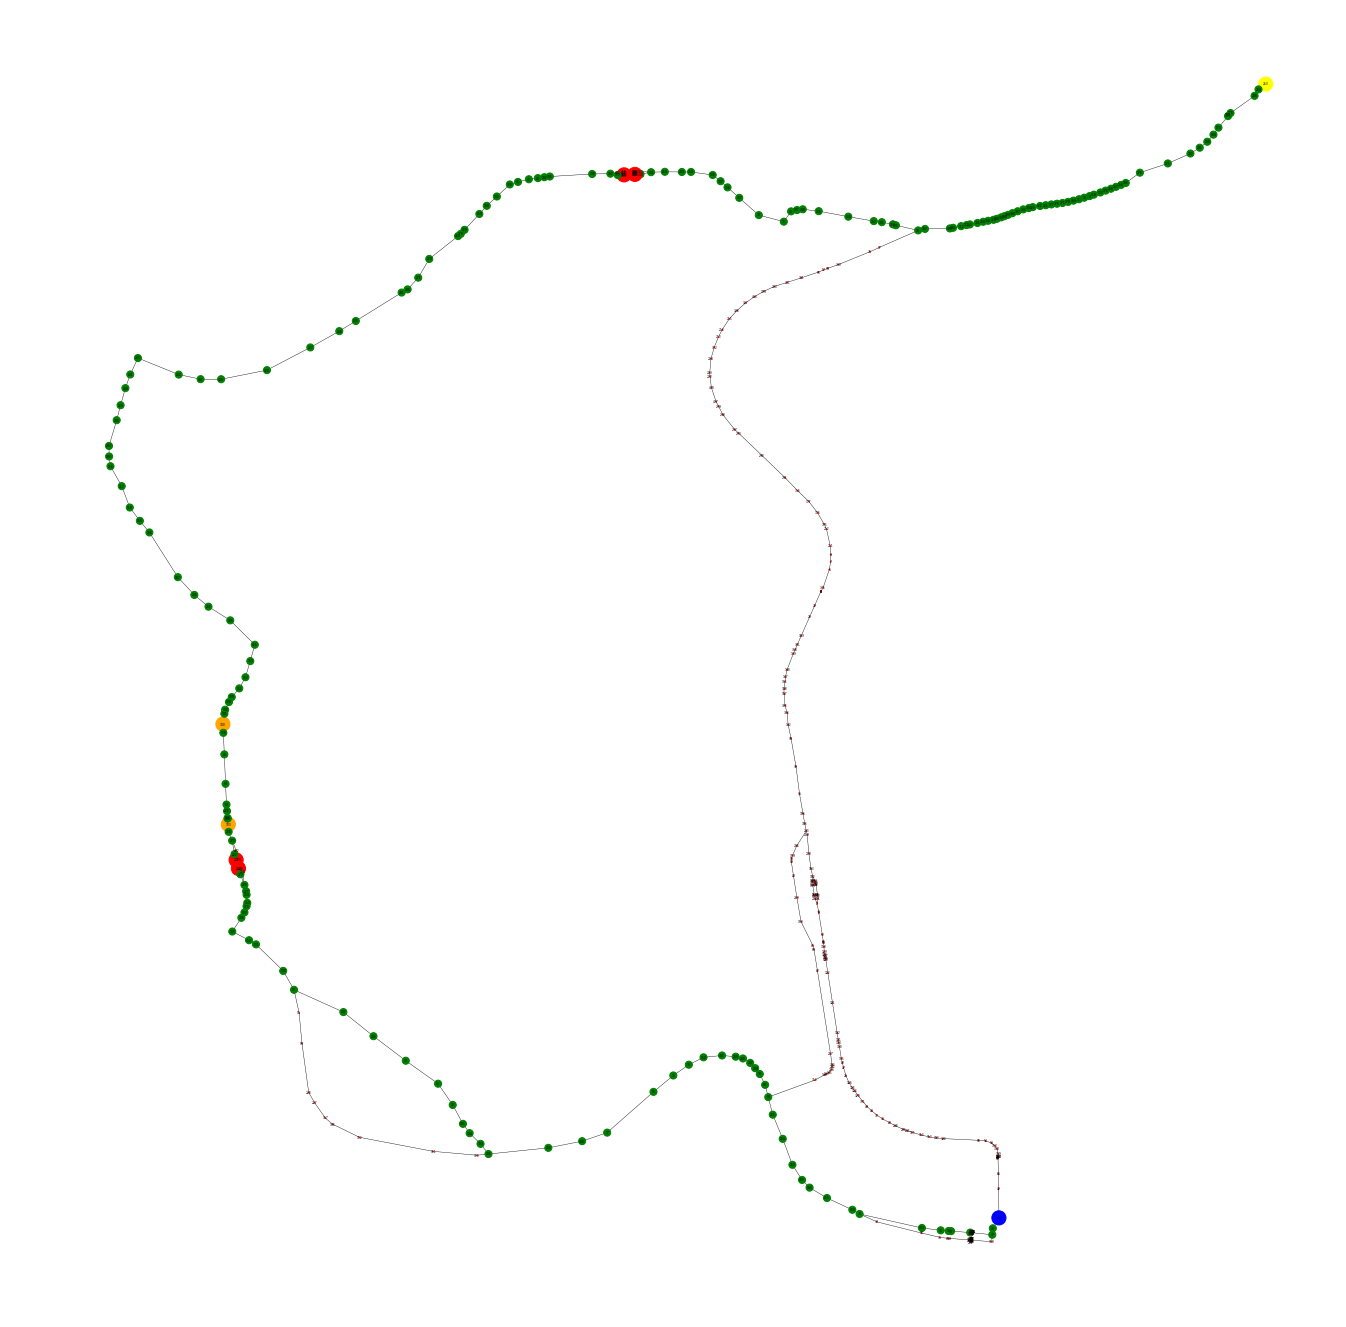

In [11]:
# running  saves a plot for all vessels
'''
for vessel in vessels[:10]:
    print(vessel.path_complete.name)
    vessel.path_complete.plot(FG, True, vessel.name)
''' 
print(vessels[50].path_complete.name)
vessels[50].path_complete.plot(FG, False, vessels[50].name)

In [12]:
# this way I can see activity at lock
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        print(lock_log, edge[2]["attribute"].lock_name)

           Message     Timestamp     Value
0     Ship in lock   5551.500629    ship-4
1    Ship out lock   7111.500629    ship-4
2     Ship in lock   9438.035777    ship-3
3     Ship in lock  10761.042713    ship-5
4    Ship out lock  10998.035777    ship-3
5    Ship out lock  12321.042713    ship-5
6     Ship in lock  12917.842862    ship-7
7     Ship in lock  12997.677558    ship-1
8    Ship out lock  14477.842862    ship-7
9    Ship out lock  14557.677558    ship-1
10    Ship in lock  16432.321492   ship-10
11    Ship in lock  16619.511849    ship-9
12    Ship in lock  16961.963273    ship-6
13   Ship out lock  17992.321492   ship-10
14   Ship out lock  18179.511849    ship-9
15   Ship out lock  18521.963273    ship-6
16    Ship in lock  18769.844010   ship-17
17   Ship out lock  20329.844010   ship-17
18    Ship in lock  20735.272676   ship-13
19    Ship in lock  21667.787941   ship-20
20    Ship in lock  22203.818229   ship-22
21   Ship out lock  22295.272676   ship-13
22   Ship o

In [13]:
print(vessels[50].path_complete.length)
print(vessels[50].loaded_capacity)
print(vessels[50].distance)
print(vessels[50].distance)
print(vessels[50].loaded_capacity)



84567.37980081535
5600
84567.88570512786
84567.88570512786
5600


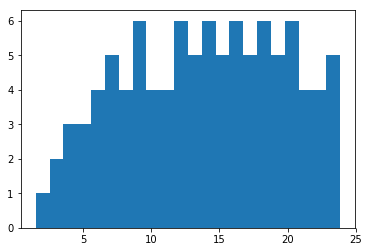

Kreekraklock


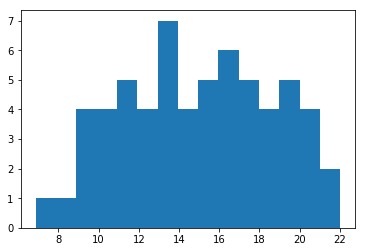

Kreekraklock


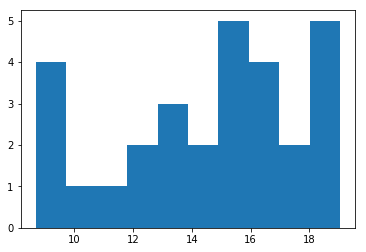

Krammerlock


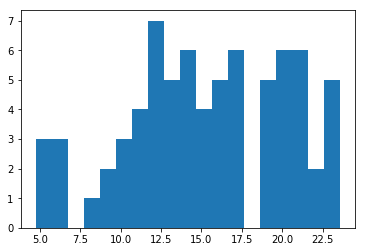

Hansweertlock


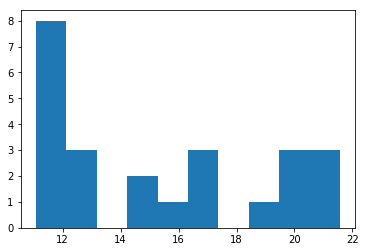

Hansweertlock


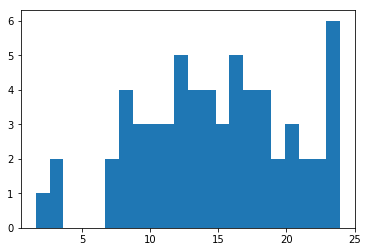

Krammerlock


In [14]:
# this way I can see activity at lock in graph
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        edge[2]["attribute"].plot_arrivales()
        #lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        #print(lock_log, edge[2]["attribute"].lock_name)
        print(edge[2]["attribute"].lock_name)

# 